# 📈 Stock Market Analysis Project: Semiconductor Industry (2024)

## Table of Contents
1. [Data Collection & Preprocessing](#1-data-collection--preprocessing)
2. [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
3. [Fundamental Analysis (FA)](#3-fundamental-analysis-fa)
4. [Technical Analysis (TA)](#4-technical-analysis-ta)
5. [Correlation Analysis](#5-correlation-analysis)
6. [Stock Evaluation Metrics](#6-stock-evaluation-metrics)
7. [Advanced Modeling](#7-advanced-modeling)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os 

In [3]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## 1. Data Collection & Preprocessing


*Collecting historical data for semiconductor stocks and preparing for analysis*

**Data Collection**: Historical stock data retrieval process from Yahoo Finance API
**Preprocessing Steps**: 
- Column selection and renaming
- Adding company name and ticker symbols
- Data cleaning and formatting

In [43]:
tech_list = ['TSM', 'NVDA', 'IONQ', 'AMD']
company_name = ["Taiwan Semiconductor", "Nvidia", "IonQ", "AMD"]

end = datetime(2024, 12, 31)
start = datetime(2024, 1, 1)

all_data = []

for symbol, name in zip(tech_list, company_name):
    df_stock = yf.download(symbol, start=start, end=end, auto_adjust=False)
    
    df_stock = df_stock[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    df_stock.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'] 
    
    df_stock['company_name'] = name
    df_stock['symbol'] = symbol
    
    df_stock = df_stock.reset_index()
    
    all_data.append(df_stock)

df = pd.concat(all_data, axis=0, ignore_index=True)

df = df.set_index('Date')

company_list = []
for symbol in tech_list:
    company_list.append(df[df['symbol'] == symbol])

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name,symbol
Date,,,,,,,,
2024-01-02,102.250000,102.620003,100.589996,101.529999,99.724220,9020900,Taiwan Semiconductor,TSM
2024-01-03,100.339996,101.250000,99.660004,100.169998,98.388412,6650600,Taiwan Semiconductor,TSM
2024-01-04,99.529999,100.440002,99.120003,99.129997,97.366898,7996700,Taiwan Semiconductor,TSM
2024-01-05,99.000000,100.639999,98.800003,99.610001,97.838371,7344900,Taiwan Semiconductor,TSM
2024-01-08,100.629997,102.790001,100.500000,102.239998,100.421585,12455600,Taiwan Semiconductor,TSM


In [52]:
data_dictionary = '../data'
os.makedirs(data_dictionary, exist_ok=True)
output_file_path = os.path.join(data_dictionary, 'semiconductor_stocks.csv')

try:
    df.to_csv(output_file_path, index=True)
except Exception as e:
    print(f"Error saving to CSV: {e}")

In [45]:
def check_daily_data(date, symbol=None):
    date = pd.to_datetime(date)

    if date not in df.index:
        nearest = df.index[df.index.get_loc(date, method='nearest')]
        print(f"Data for {date.strftime('%Y-%m-%d')} not found. Nearest date: {nearest.strftime('%Y-%m-%d')}")
        return None

    if symbol:
        result = df.loc[date, df['symbol'] == symbol]
        if result.empty:
            print(f"No data found for {symbol} on {date.strftime('%Y-%m-%d')}")
            return None
        return result
    else:
        return df.loc[date]

check_daily_data('2024-01-02')

,Open,High,Low,Close,Adj Close,Volume,company_name,symbol
Date,,,,,,,,
2024-01-02,102.250000,102.620003,100.589996,101.529999,99.724220,9020900,Taiwan Semiconductor,TSM
2024-01-02,49.243999,49.294998,47.595001,48.167999,48.146572,411254000,Nvidia,NVDA
2024-01-02,12.350000,12.590000,12.100000,12.160000,12.160000,5951100,IonQ,IONQ
2024-01-02,144.279999,144.399994,137.429993,138.580002,138.580002,64902000,AMD,AMD


**Descriptive Statistics**: Statistical overview of the dataset

In [46]:
for i, company in enumerate(company_list, 1):
    print(f"Descriptive statistics for {company_name[i-1]}:")
    print(company.describe().T, "\n")

Descriptive statistics for Taiwan Semiconductor:
           count          mean           std           min           25%  \
Open       251.0  1.604146e+02  2.806801e+01  9.900000e+01  1.388300e+02   
High       251.0  1.625947e+02  2.832845e+01  1.004400e+02  1.414400e+02   
Low        251.0  1.579764e+02  2.752977e+01  9.880000e+01  1.373100e+02   
Close      251.0  1.602671e+02  2.785245e+01  9.913000e+01  1.390250e+02   
Adj Close  251.0  1.585058e+02  2.812480e+01  9.736690e+01  1.370181e+02   
Volume     251.0  1.503144e+07  7.830895e+06  5.794200e+06  1.029980e+07   

                    50%           75%           max  
Open       1.643000e+02  1.846550e+02  2.059500e+02  
High       1.666500e+02  1.867450e+02  2.126000e+02  
Low        1.610500e+02  1.822800e+02  2.045500e+02  
Close      1.643900e+02  1.845150e+02  2.073600e+02  
Adj Close  1.621219e+02  1.828802e+02  2.065552e+02  
Volume     1.292440e+07  1.770250e+07  6.227470e+07   

Descriptive statistics for Nvidia:
   

**Data Information**: Structure and characteristics of the processed data

In [47]:
for i, company in enumerate(company_list, 1):
    print(f"Infomation for {company_name[i-1]}:")
    print(company.info(), "\n")

Infomation for Taiwan Semiconductor:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
 7   symbol        251 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 17.6+ KB
None 

Infomation for Nvidia:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251

**Outliers**: Using statistics and IQR(Interquartile Range) to determine the outliers

In [48]:
from scipy import stats

for i, company in enumerate(company_list, 1):
    z_score = np.abs(stats.zscore(company['Close']))
    outliners = np.where(z_score > 3)

    print(f"Outliers for {company_name[i-1]}:")
    if len(outliners[0]) > 0:
        print(company.iloc[outliners[0]])
    else:
        print("No outliers found.")
    print("\n")

Outliers for Taiwan Semiconductor:
No outliers found.


Outliers for Nvidia:
No outliers found.


Outliers for IonQ:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2024-12-16  32.470001  42.810001  32.389999  41.810001  41.810001  42539400   
2024-12-17  41.639999  43.939999  39.250000  43.840000  43.840000  31560500   
2024-12-20  36.959999  47.410000  36.700001  44.419998  44.419998  47711400   
2024-12-23  45.330002  45.500000  41.299999  41.320000  41.320000  27057200   
2024-12-24  41.990002  45.400002  39.840000  44.580002  44.580002  18418400   
2024-12-26  44.500000  48.560001  42.560001  48.240002  48.240002  24726600   
2024-12-27  46.869999  48.250000  44.500000  45.480000  45.480000  22491400   
2024-12-30  44.599998  45.790001  41.509998  44.290001  44.290001  17610900   

           company_name symbol  
Date                            
2024-12-16         IonQ   

In [51]:
for i, company in enumerate(company_list, 1):
    Q1 = company['Close'].quantile(0.25)
    Q3 = company['Close'].quantile(0.75)
    IQR = Q3 - Q1

    outliner_condition = (company['Close'] < (Q1 - 1.5 * IQR)) | (company['Close'] > (Q3 + 1.5 * IQR))
    outliners = company[outliner_condition]
    print(f"Outliers for {company_name[i-1]} using IQR method:")

    if not outliners.empty:
        print(outliners)
    else:
        print("No outliers found.")
    print("\n")

Outliers for Taiwan Semiconductor using IQR method:
No outliers found.


Outliers for Nvidia using IQR method:
No outliers found.


Outliers for IonQ using IQR method:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2024-10-28  17.520000  18.200001  16.549999  17.809999  17.809999  31529500   
2024-11-07  16.430000  22.620001  16.290001  22.110001  22.110001  70733400   
2024-11-08  21.690001  25.680000  21.309999  24.790001  24.790001  64845200   
2024-11-11  24.389999  24.490000  21.299999  23.520000  23.520000  35693700   
2024-11-12  22.000000  25.440001  22.000000  23.010000  23.010000  28019200   
2024-11-13  23.879999  27.650000  23.670000  26.760000  26.760000  41306100   
2024-11-14  27.900000  28.049999  24.870001  26.160000  26.160000  35122500   
2024-11-15  26.290001  29.480000  25.030001  29.139999  29.139999  37576000   
2024-11-18  28.150000  28.469999  22.27000

## 2. Exploratory Data Analysis (EDA)


**Closing Price Visualization**: Comparative analysis of stock price movements

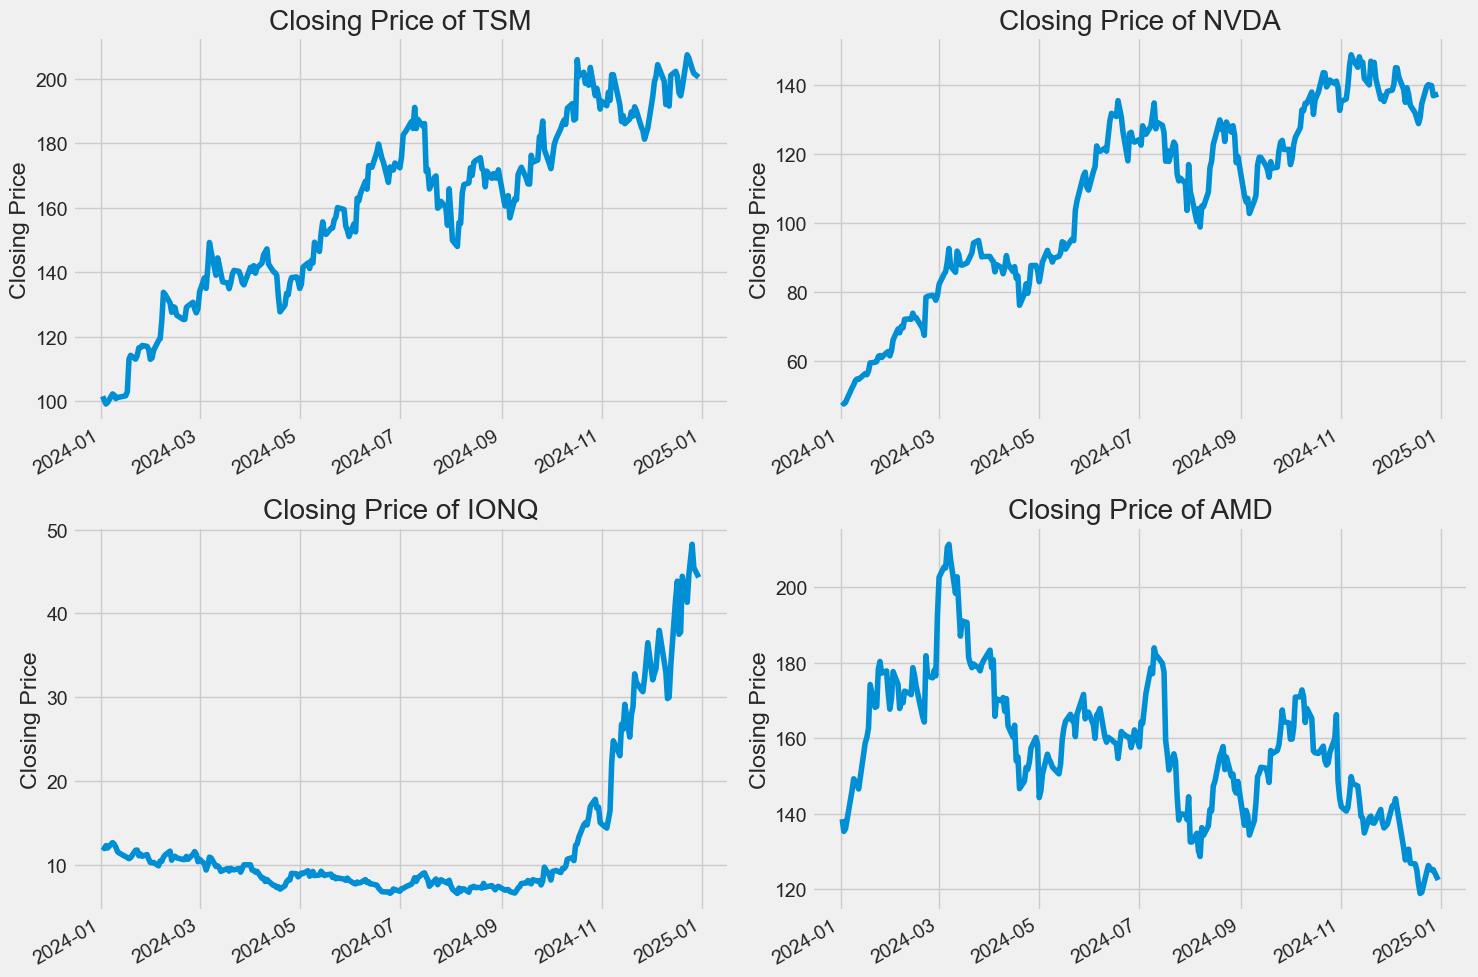

In [31]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
   
plt.tight_layout()
plt.show() 

**Trading Volume Analysis**: Examination of market activity patterns

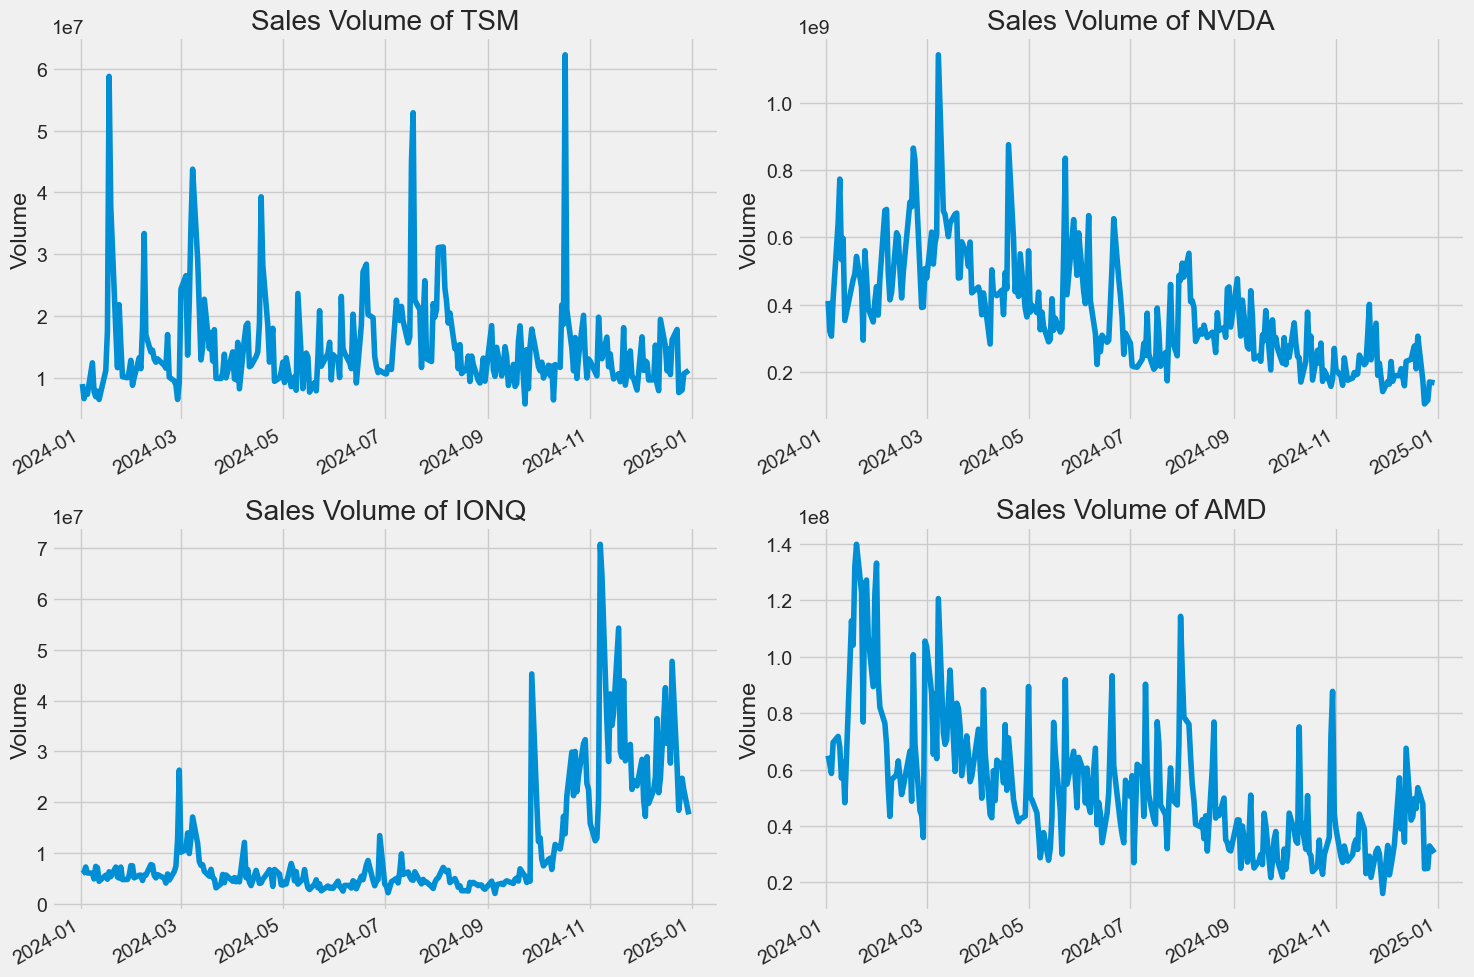

In [33]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {tech_list[i - 1]}")

plt.tight_layout()

**Candlestick Chart**: Detailed price action visualization for TSM stock

In [ ]:
symbol = 'TSM'
i = tech_list.index(symbol)
name = company_name[i]

company_data = df[df['symbol'] == symbol]
df_candle = company_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.05,
                    row_heights=[0.7, 0.3])

fig.add_trace(go.Candlestick(
    x=df_candle.index,
    open=df_candle['Open'],
    high=df_candle['High'],
    low=df_candle['Low'],
    close=df_candle['Close'],
    name=f'{symbol} Price',
    increasing_line_color='green',
    decreasing_line_color='red'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_candle.index,
    y=df_candle['Volume'],
    name='Volume',
    marker_color='blue'
), row=2, col=1)

fig.update_layout(
    title=f'{symbol} ({name}) - Candle chart (2024)',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    height=600,
    template='plotly_white',
    hovermode="x unified",
    xaxis_rangeslider_visible=False
)

fig.update_yaxes(title_text="Volume", row=2, col=1)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"yaxis.type": "linear"}],
                    label="Linear Scale",
                    method="relayout"
                ),
                dict(
                    args=[{"yaxis.type": "log"}],
                    label="Logarit",
                    method="relayout"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

In [47]:
html_content = fig.to_html(
    full_html=False,
    include_plotlyjs='cdn',
    config={'displayModeBar': True},
    div_id='tsm-forecast-chart'
)

with open("canle_chart.html", "w") as f:
    f.write(f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <title></title>
        <style>
            .chart-container {{
                margin: 20px auto;
                border: 1px solid #eee;
                border-radius: 8px;
                padding: 15px;
            }}
        </style>
    </head>
    <body>
        <h1></h1>
        <div class="chart-container">
            {html_content}
        </div>
    </body>
    </html>
    """)

## 3. Fundamental Analysis (FA)
**Introduction to FA**: Explanation of fundamental analysis methodology
- **Key Financial Metrics**:
    - Valuation Ratios: P/E, Forward P/E, PEG Ratio
    - Profitability: EPS, ROE, Profit Margin
    - Financial Health: Price/Book, Debt/Equity
    - Shareholder Returns: Dividend Yield
- **FA Metrics Summary**: Comparative table of fundamental indicators

In [34]:
def get_fundamental_indicators(ticker):
    stock = yf.Ticker(ticker)
    info = stock.info
    
    pe_ratio = info.get('trailingPE', None)
    forward_pe = info.get('forwardPE', None)
    peg_ratio = info.get('pegRatio', None)
    eps = info.get('trailingEps', None)
    book_value = info.get('bookValue', None)
    price_to_book = info.get('priceToBook', None)
    dividend_yield = info.get('dividendYield', None)
    roe = info.get('returnOnEquity', None)
    debt_to_equity = info.get('debtToEquity', None)
    profit_margins = info.get('profitMargins', None)
    
    return {
        'Ticker': ticker,
        'P/E': round(pe_ratio, 2) if pe_ratio else None,
        'Forward P/E': round(forward_pe, 2) if forward_pe else None,
        'PEG Ratio': round(peg_ratio, 2) if peg_ratio else None,
        'EPS': round(eps, 2) if eps else None,
        'Price/Book': round(price_to_book, 2) if price_to_book else None,
        'Dividend Yield (%)': round(dividend_yield * 100, 2) if dividend_yield else None,
        'ROE (%)': round(roe * 100, 2) if roe else None,
        'Debt/Equity': round(debt_to_equity, 2) if debt_to_equity else None,
        'Profit Margin (%)': round(profit_margins * 100, 2) if profit_margins else None
    }


In [49]:
fa_data = []
for symbol in tech_list:
    fa_data.append(get_fundamental_indicators(symbol))

In [50]:
fa_df = pd.DataFrame(fa_data)
print("FUNDAMENTAL ANALYSIS INDICATORS")
display(fa_df)

FUNDAMENTAL ANALYSIS INDICATORS


,Ticker,P/E,Forward P/E,PEG Ratio,EPS,Price/Book,Dividend Yield (%),ROE (%),Debt/Equity,Profit Margin (%)
0,TSM,25.25,26.13,None,8.36,1.20,156.0,31.64,23.49,41.69
1,NVDA,45.94,34.46,None,3.09,41.29,3.0,115.46,12.27,51.69
2,IONQ,NaN,-43.00,None,-1.51,12.02,NaN,-52.11,2.27,NaN
3,AMD,84.79,22.78,None,1.37,3.24,NaN,3.90,8.17,8.02


## 4. Technical Analysis (TA)

**Moving Averages**: Analysis of 10-day, 20-day, and 50-day moving averages

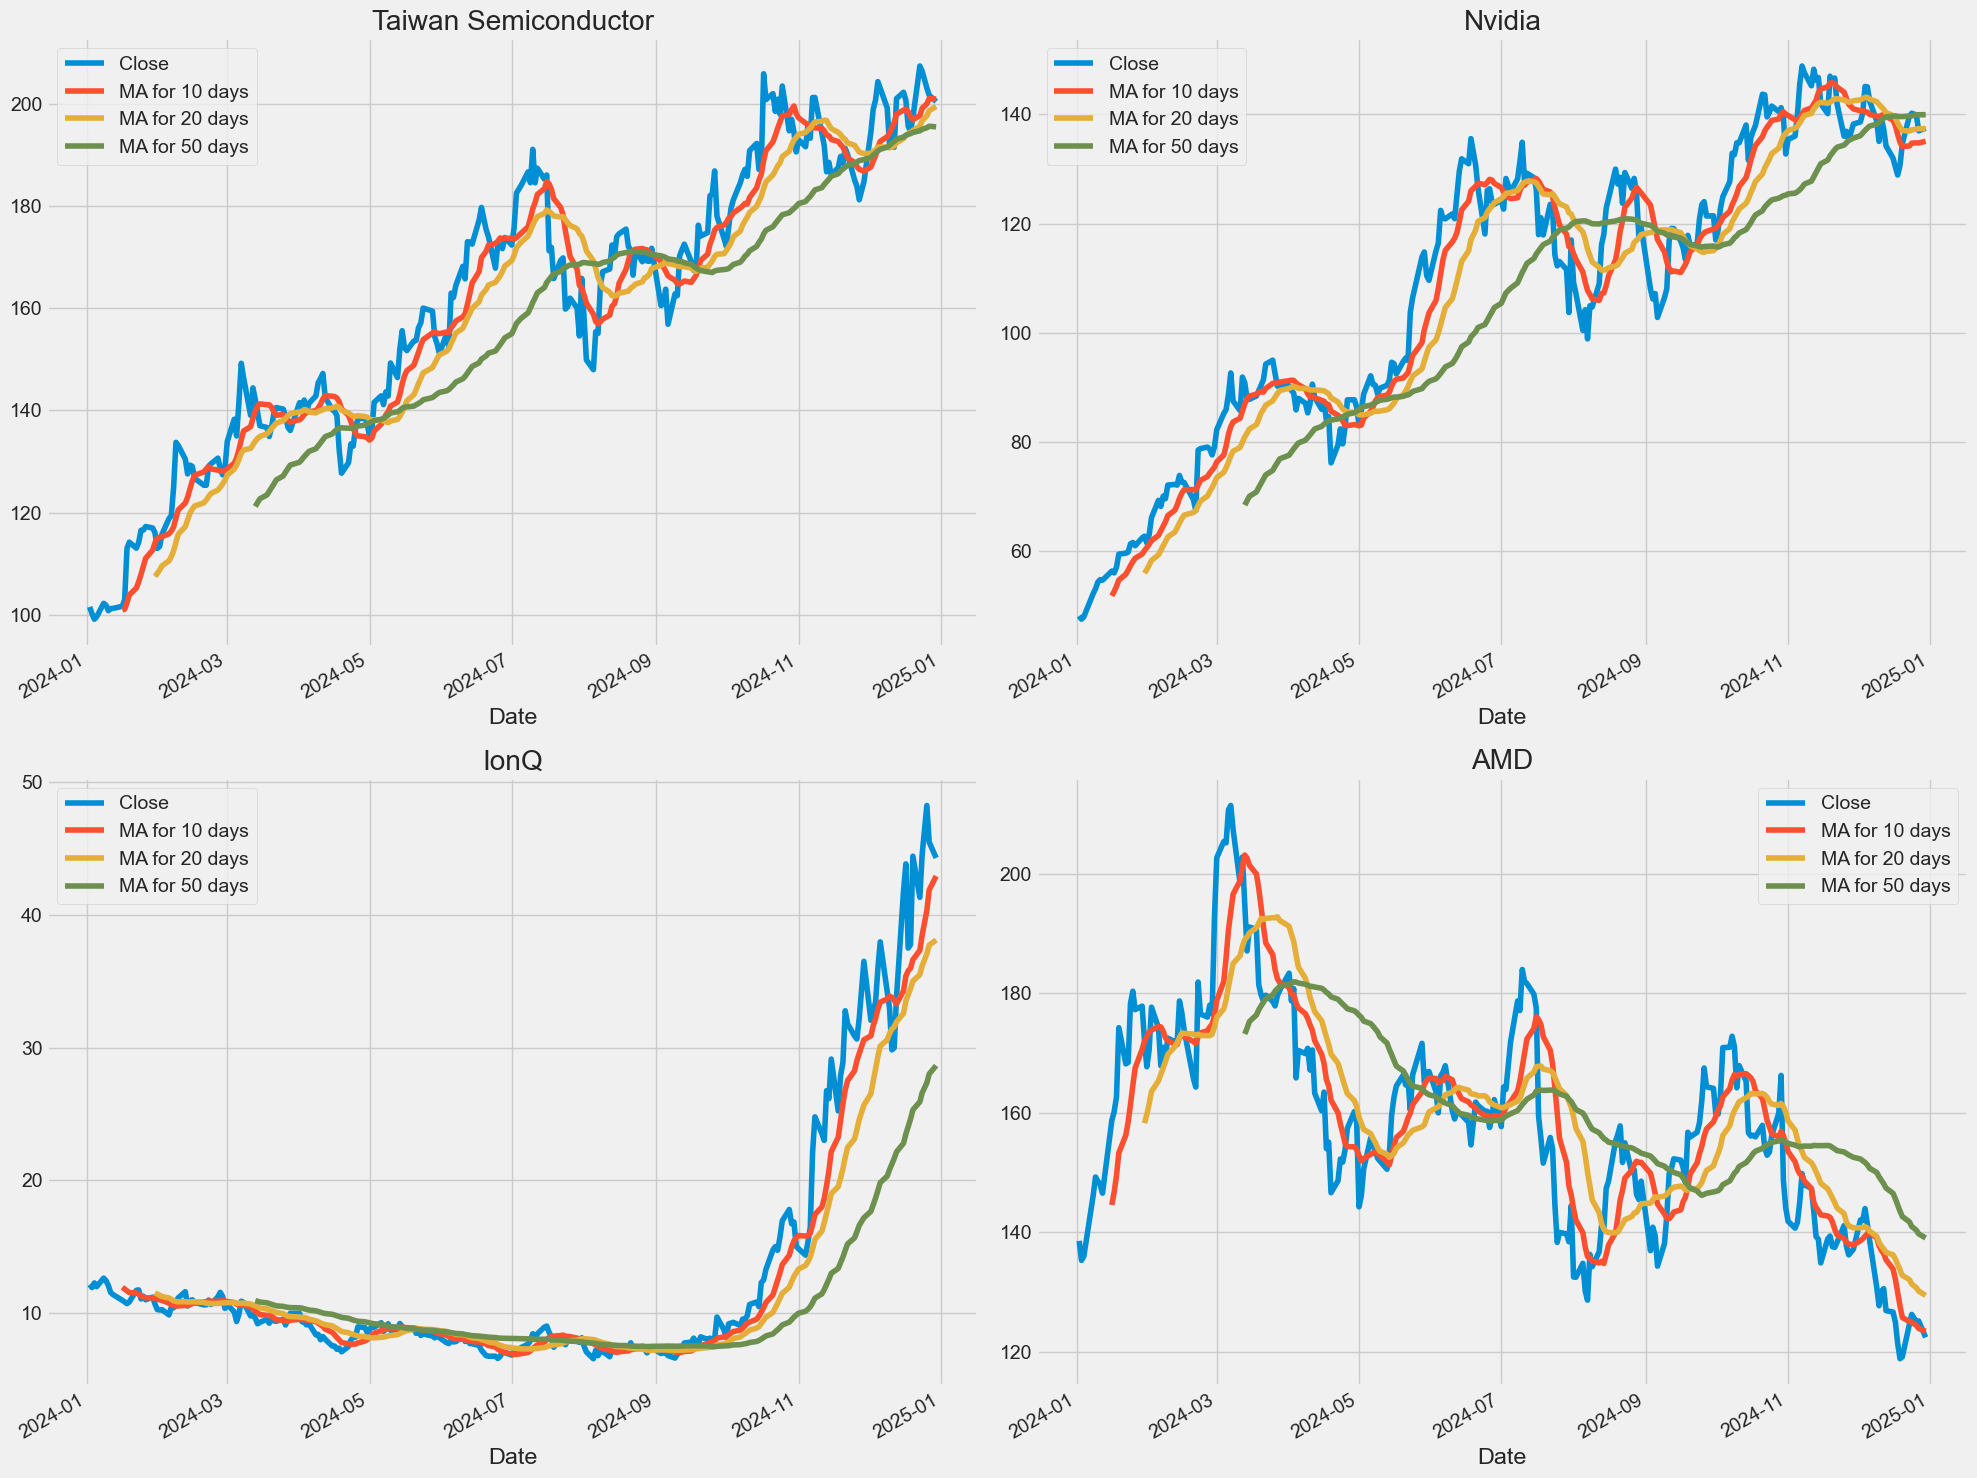

In [36]:
ma_days = [10, 20, 50]

for ma in ma_days:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company.loc[:, column_name] = company['Close'].rolling(window=ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2) 
fig.set_figwidth(20)
fig.set_figheight(15)

company_list[0][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 0])
axes[0, 0].set_title('Taiwan Semiconductor')

company_list[1][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0, 1])
axes[0, 1].set_title('Nvidia')

company_list[2][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 0])
axes[1, 0].set_title('IonQ')

company_list[3][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1, 1])
axes[1, 1].set_title('AMD')

fig.tight_layout()

**Daily Returns**:
- Calculation of daily price changes
- Return distribution histograms

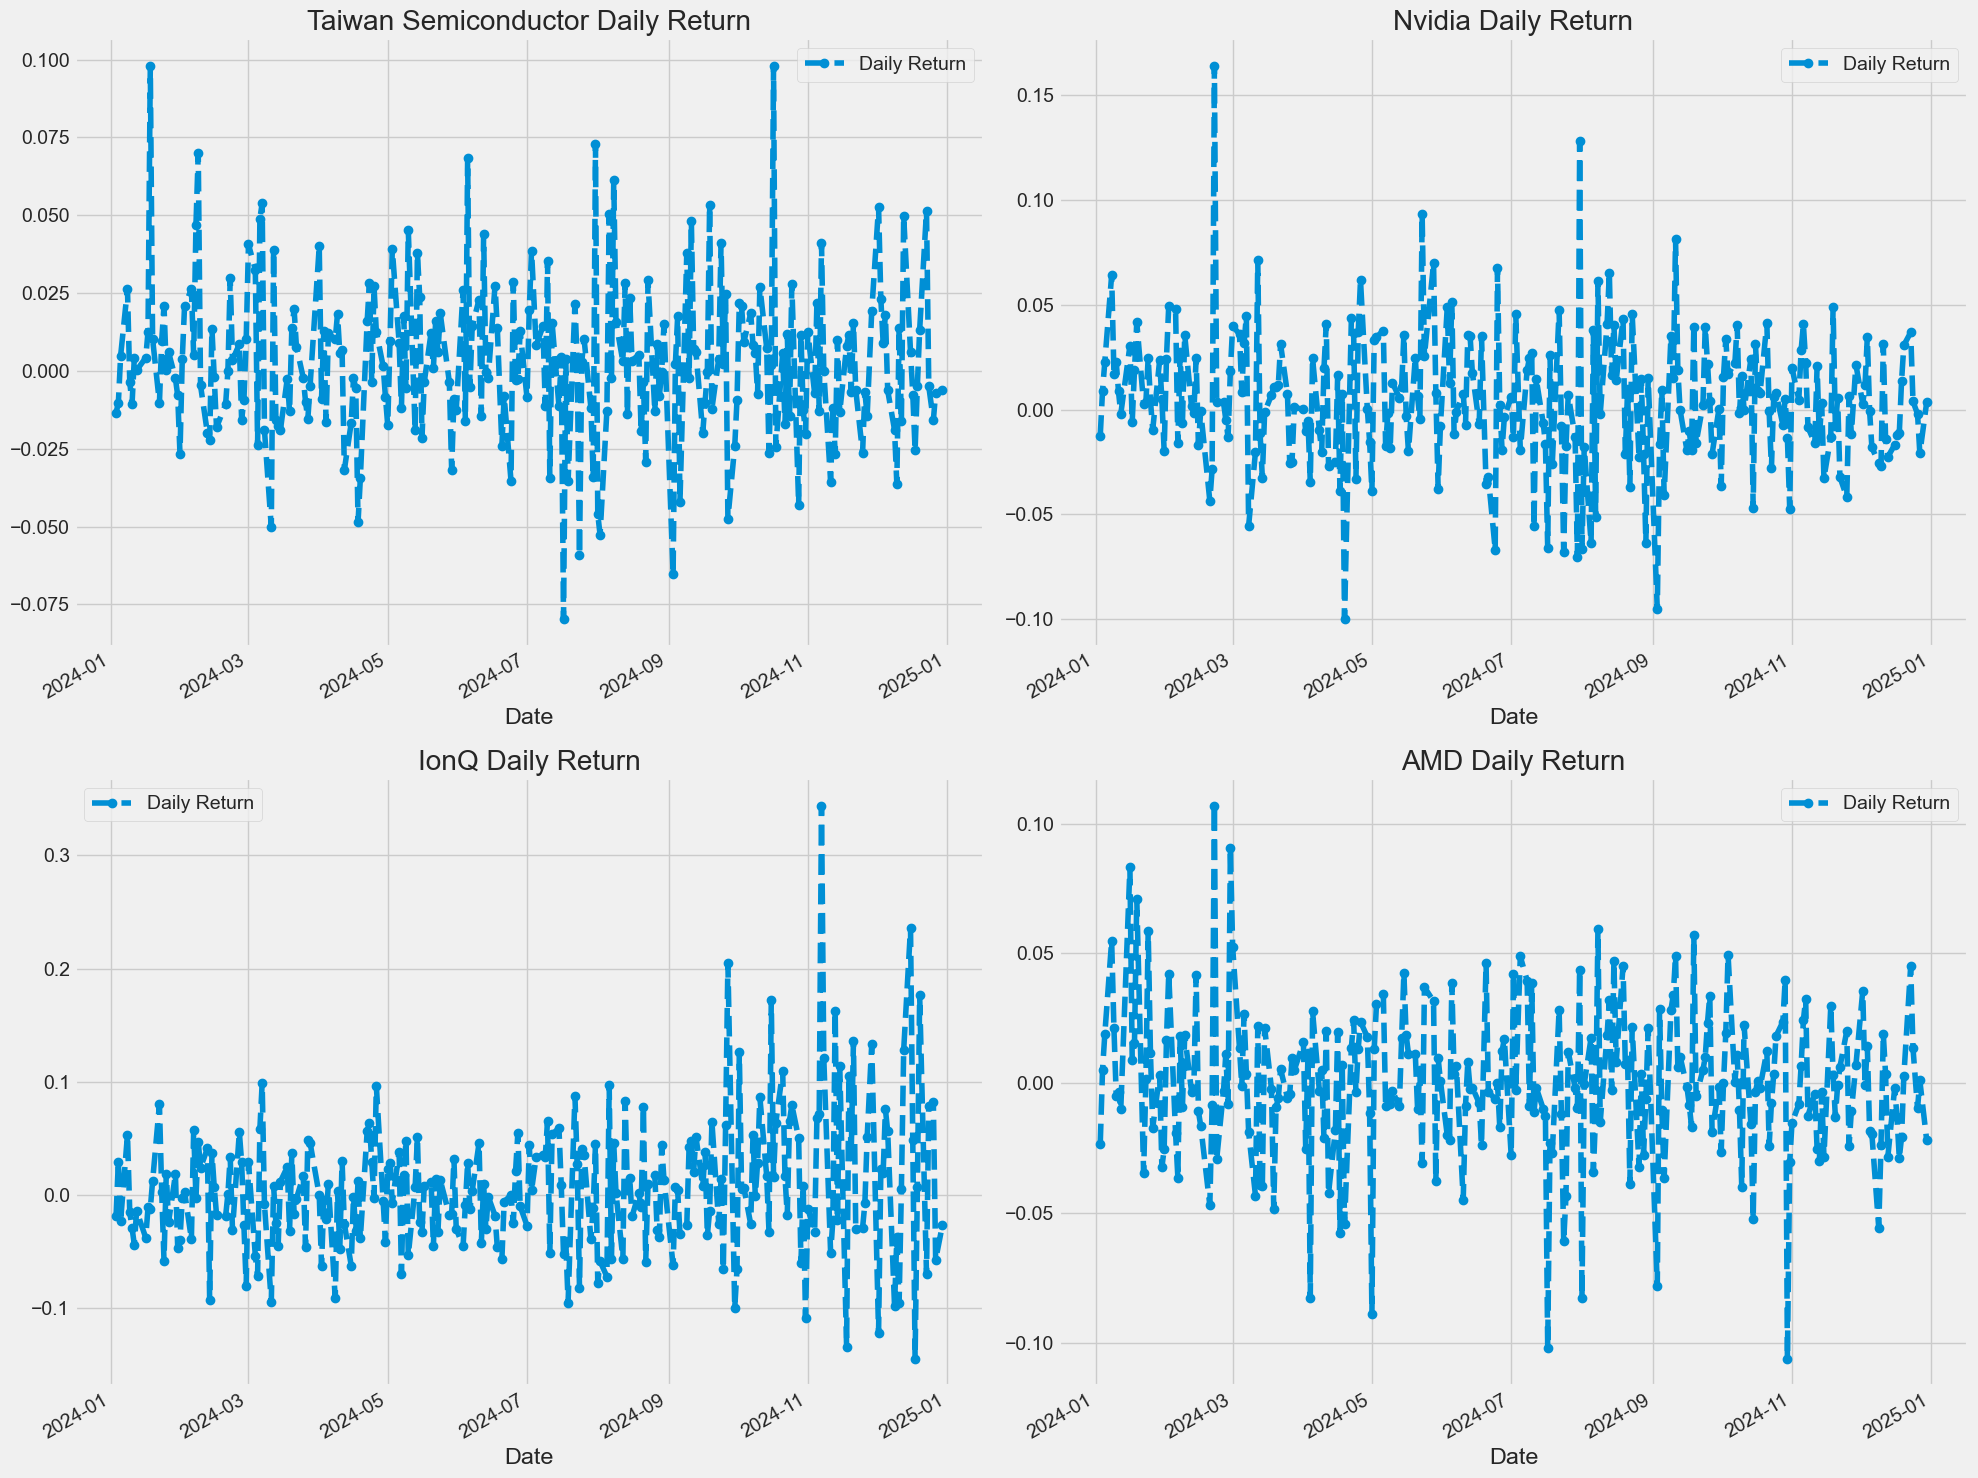

In [38]:
for company in company_list:
    company.loc[:, 'Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(20)
fig.set_figheight(15)

company_list[0]['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('Taiwan Semiconductor Daily Return')

company_list[1]['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('Nvidia Daily Return')

company_list[2]['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('IonQ Daily Return')

company_list[3]['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMD Daily Return')

fig.tight_layout()

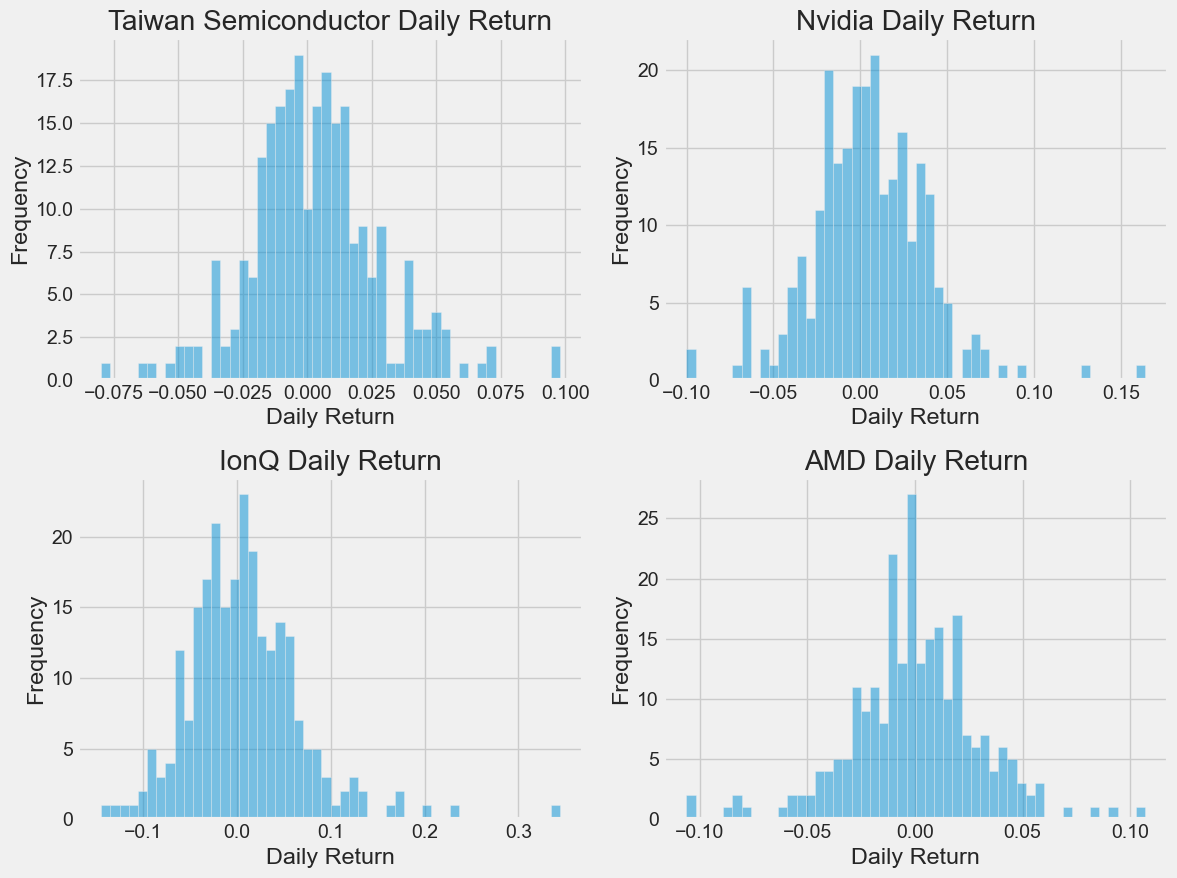

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, alpha=0.5)
    plt.title(f"{company_name[i-1]} Daily Return")
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')

plt.tight_layout()

**Advanced Technical Indicators**:
- Momentum: RSI (Relative Strength Index)
- Trend: MACD (Moving Average Convergence Divergence)
- Volatility: Bollinger Bands
- Oscillator: Stochastic %K/%D

In [13]:
def calculate_ta_indicators(df):
    df = df.copy()

    # RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # MACD (Moving Average Convergence Divergence)
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['Histogram'] = df['MACD'] - df['Signal']
    
    # Bollinger Bands
    sma20 = df['Close'].rolling(window=20).mean()
    std20 = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = sma20 + (std20 * 2)
    df['Bollinger_Lower'] = sma20 - (std20 * 2)
    
    # Stochastic Oscillator
    low14 = df['Low'].rolling(window=14).min()
    high14 = df['High'].rolling(window=14).max()
    df['%K'] = 100 * ((df['Close'] - low14) / (high14 - low14))
    df['%D'] = df['%K'].rolling(window=3).mean()
    
    return df

**Technical Visualization**: Charting of key indicators for TSM

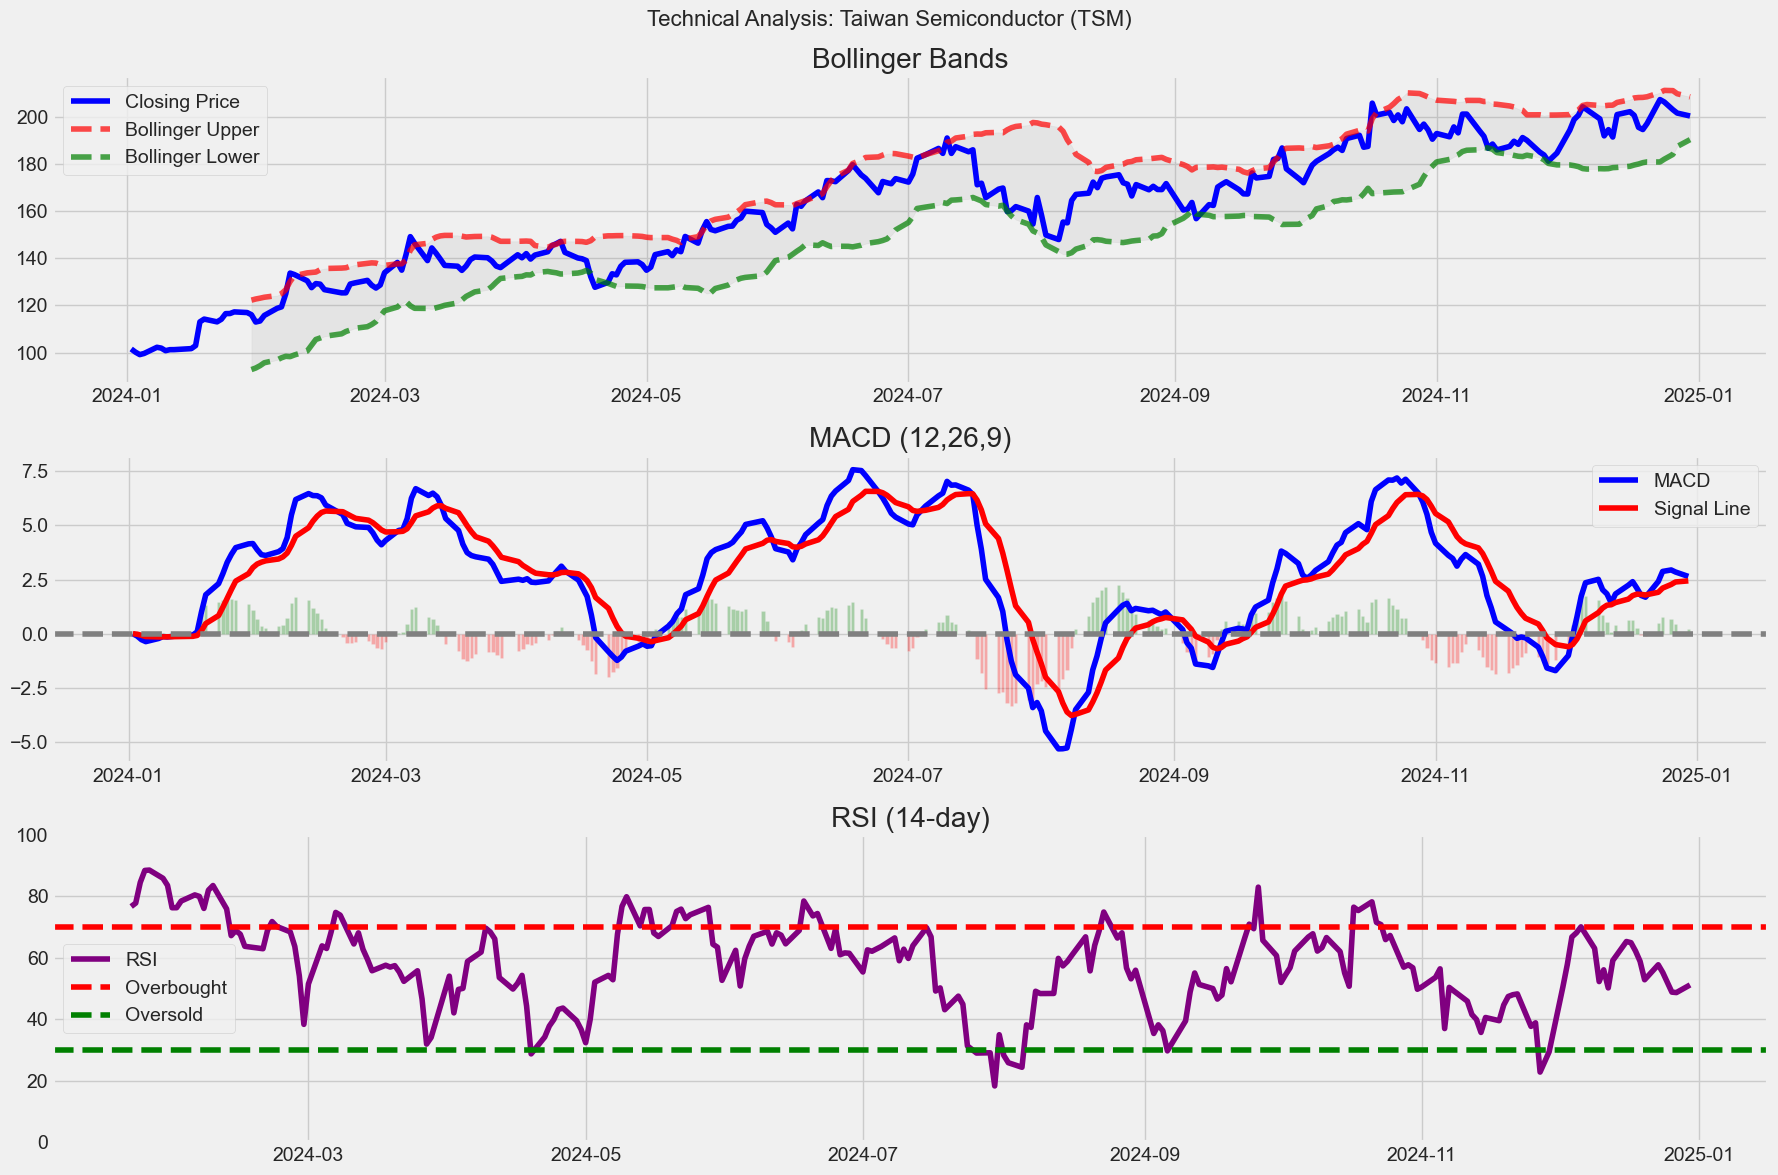

In [14]:
tsm_index = tech_list.index('TSM')

# Calculate Technical Indicators for TSM
company = company_list[tsm_index]
company = calculate_ta_indicators(company)
company_list[tsm_index] = company

# Technical Analysis Plot
plt.figure(figsize=(18, 12))
plt.suptitle(f'Technical Analysis: {company_name[tsm_index]} (TSM)', fontsize=16)

# Price and Bollinger Bands Plot
plt.subplot(3, 1, 1)
plt.plot(company['Close'], label='Closing Price', color='blue')
plt.plot(company['Bollinger_Upper'], label='Bollinger Upper', color='red', linestyle='--', alpha=0.7)
plt.plot(company['Bollinger_Lower'], label='Bollinger Lower', color='green', linestyle='--', alpha=0.7)
plt.fill_between(company.index, company['Bollinger_Lower'], company['Bollinger_Upper'], color='gray', alpha=0.1)
plt.title('Bollinger Bands')
plt.legend()

# MACD Plot
plt.subplot(3, 1, 2)
plt.plot(company['MACD'], label='MACD', color='blue')
plt.plot(company['Signal'], label='Signal Line', color='red')
plt.bar(company.index, company['Histogram'], color=np.where(company['Histogram'] > 0, 'g', 'r'), alpha=0.3)
plt.title('MACD (12,26,9)')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()

# RSI Plot
plt.subplot(3, 1, 3)
plt.plot(company['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.ylim(0, 100)
plt.title('RSI (14-day)')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Correlation Analysis

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

In [56]:
closing_df = yf.download(tech_list, start=start, end=end)['Close']

tech_rets = closing_df.pct_change()
tech_rets.head()

C:\Users\Rainbow\AppData\Local\Temp\ipykernel_19984\3081815884.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  4 of 4 completed


Ticker,AMD,IONQ,NVDA,TSM
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.023524,-0.018914,-0.012436,-0.013395
2024-01-04,0.005099,0.029338,0.009019,-0.010382
2024-01-05,0.018896,-0.022801,0.022897,0.004842
2024-01-08,0.054842,0.053333,0.064281,0.026403


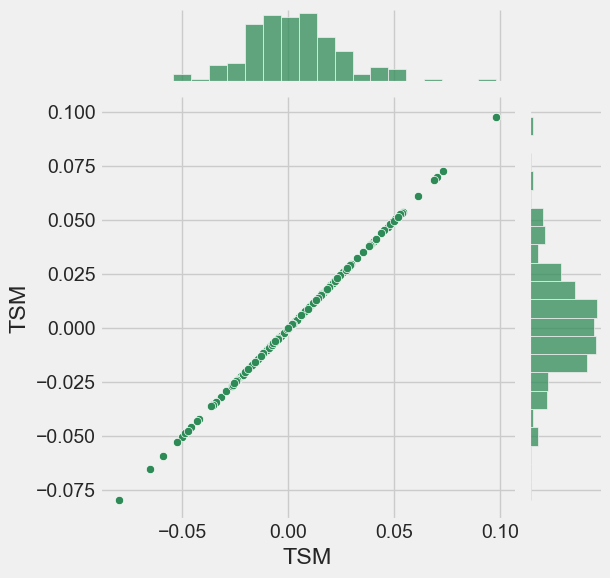

In [57]:
sns.jointplot(x='TSM', y='TSM', data=tech_rets, kind='scatter', color='seagreen')

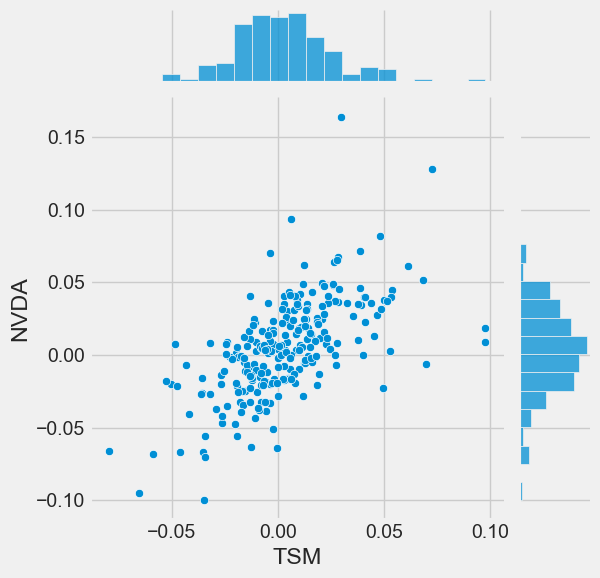

In [58]:
sns.jointplot(x='TSM', y='NVDA', data=tech_rets, kind='scatter')

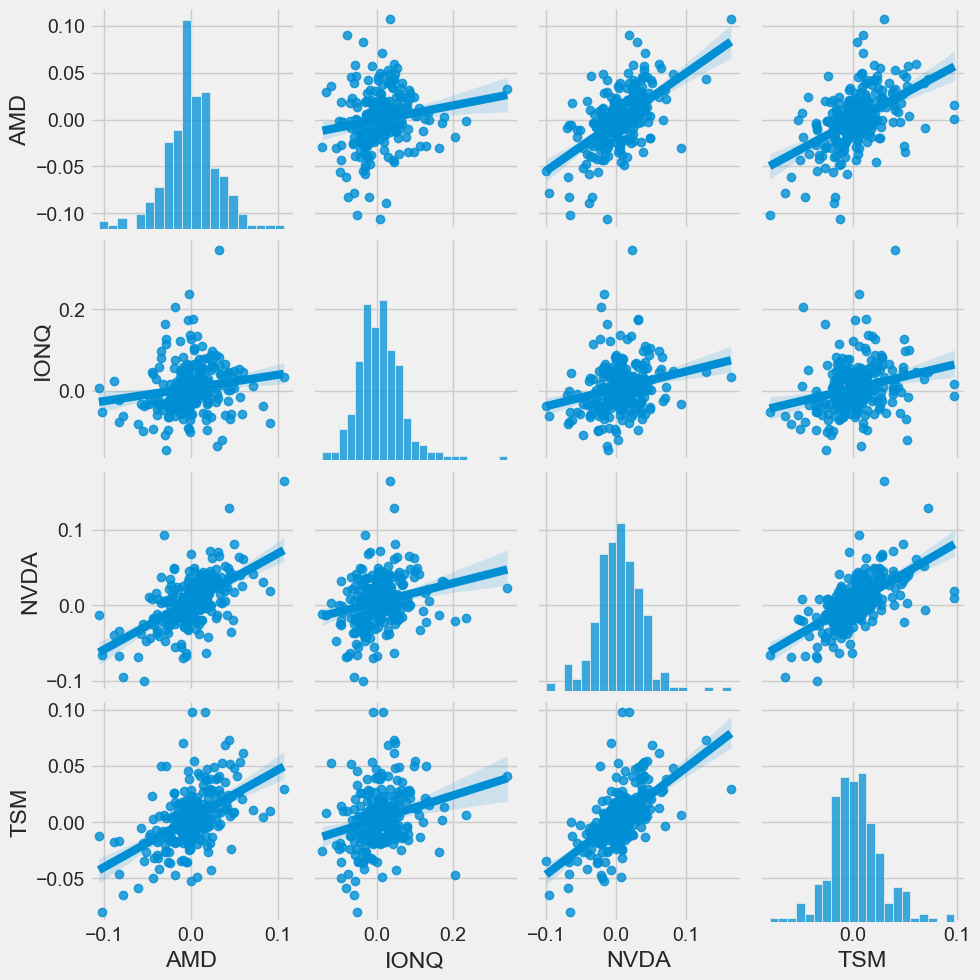

In [59]:
sns.pairplot(tech_rets, kind='reg')

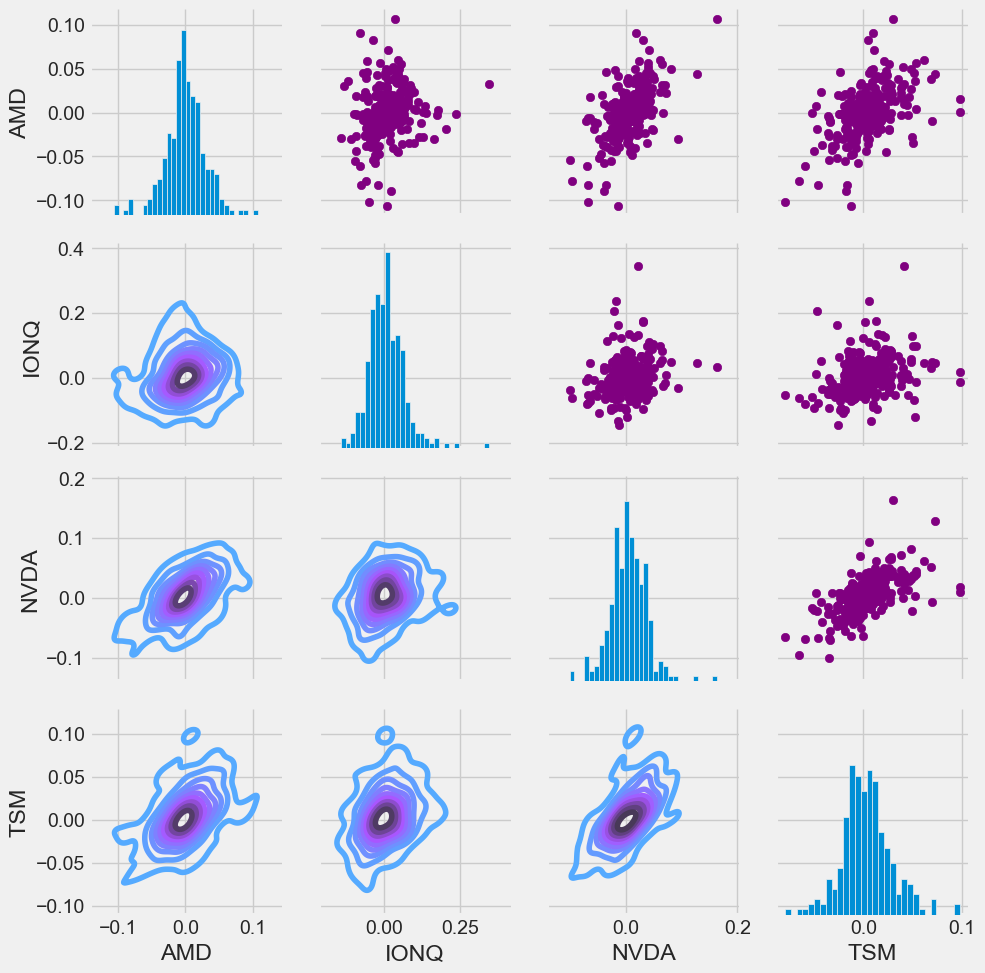

In [60]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

- **Daily Return Correlation**: 
    - Pairwise return correlation heatmap
    - Scatter matrix of daily returns
- **Closing Price Correlation**:
    - Heatmap of price correlation coefficients
    - Rolling correlation analysis

Text(0.5, 1.0, 'Correlation between Closing Prices')

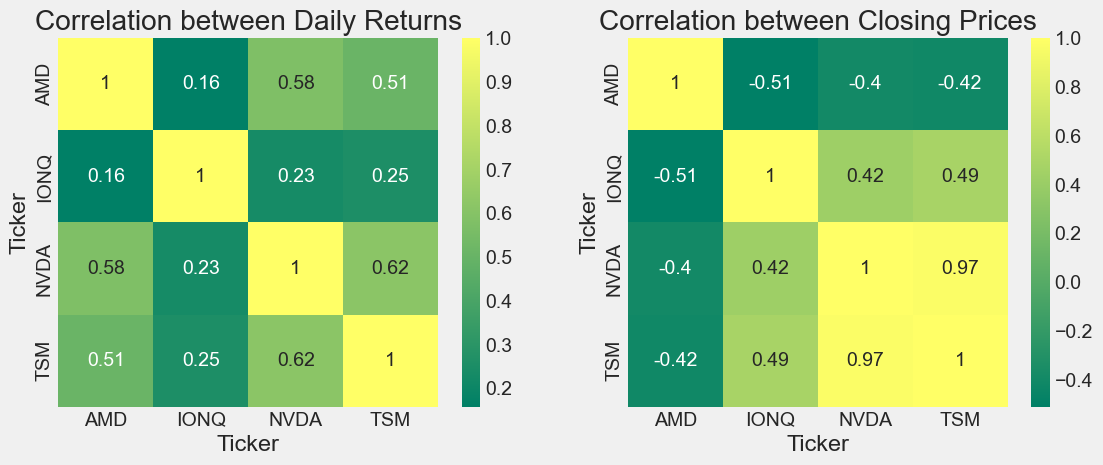

In [61]:
plt.figure(figsize=(12,10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation between Daily Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation between Closing Prices')

**Risk-Return Profile**: Expected returns vs. standard deviation comparison

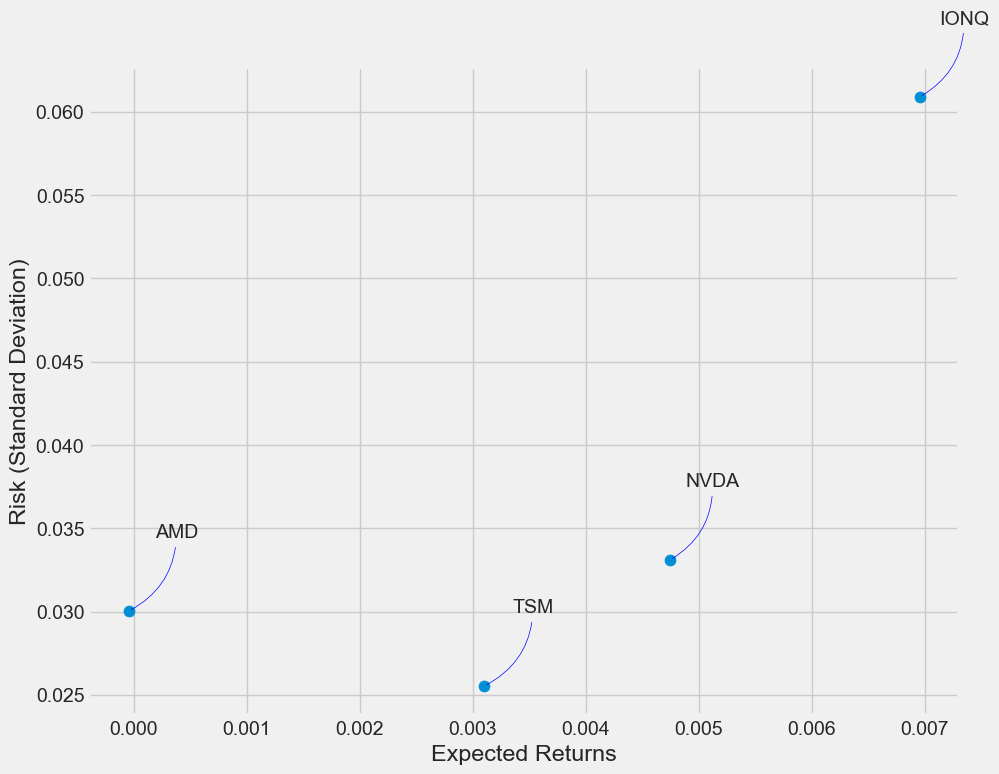

In [62]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk (Standard Deviation)')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## 6. Stock Evaluation Metrics

In [15]:
for i in range(len(company_list)):
    company = company_list[i]
    company = calculate_ta_indicators(company)
    company_list[i] = company

In [64]:
def evaluate_stock(df, fa_data):
    """Comprehensive stock evaluation based on FA and TA"""
    # FA scoring
    fa_score = 0
    if fa_data['P/E'] and fa_data['P/E'] < 25: fa_score += 1
    if fa_data['Forward P/E'] and fa_data['Forward P/E'] < 20: fa_score += 1
    if fa_data['ROE (%)'] and fa_data['ROE (%)'] > 15: fa_score += 1
    if fa_data['Profit Margin (%)'] and fa_data['Profit Margin (%)'] > 10: fa_score += 1
    if fa_data['Debt/Equity'] and fa_data['Debt/Equity'] < 1: fa_score += 1
    
    # TA scoring
    ta_score = 0
    latest = df.iloc[-1]
    
    # Trend analysis
    if latest['Close'] > df['Close'].rolling(50).mean().iloc[-1]: ta_score += 1
    if latest['RSI'] > 50: ta_score += 0.5
    if latest['MACD'] > latest['Signal']: ta_score += 0.5
    if latest['Close'] > latest['Bollinger_Lower']: ta_score += 0.5
    if latest['Close'] < latest['Bollinger_Upper']: ta_score += 0.5
    
    return {
        'Ticker': fa_data['Ticker'],
        'FA Score': fa_score,
        'TA Score': round(ta_score, 1),
        'Total Score': round(fa_score + ta_score, 1),
        'Rating': 'STRONG BUY' if (fa_score + ta_score) >= 6 else 'BUY' if (fa_score + ta_score) >= 4 else 'NEUTRAL'
    }

In [65]:
evaluation_results = []
for i, symbol in enumerate(tech_list):
    evaluation = evaluate_stock(company_list[i], fa_data[i])
    evaluation_results.append(evaluation)


In [66]:
evaluation_df = pd.DataFrame(evaluation_results)
print("\nSTOCK EVALUATION SUMMARY")
display(evaluation_df.sort_values('Total Score', ascending=False))


STOCK EVALUATION SUMMARY


,Ticker,FA Score,TA Score,Total Score,Rating
0,TSM,2,3.0,5.0,BUY
2,IONQ,1,3.0,4.0,BUY
1,NVDA,2,1.5,3.5,NEUTRAL
3,AMD,0,1.5,1.5,NEUTRAL


## 7. Advanced Modeling

In [16]:
df = yf.download('TSM', start='2012-01-01', end=datetime.now(), auto_adjust=True)

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSM,TSM,TSM,TSM,TSM
Date,,,,,
2012-01-03,9.177258,9.239548,9.038838,9.073443,8910500
2012-01-04,9.094207,9.142654,9.024996,9.101127,7386600
2012-01-05,9.177258,9.191100,9.094206,9.128811,10306100
2012-01-06,9.101125,9.184177,9.059599,9.184177,7775800
2012-01-09,9.260309,9.267230,9.087284,9.101126,7543100
...,...,...,...,...,...
2025-06-12,215.429993,215.880005,211.910004,212.919998,9796100
2025-06-13,211.100006,213.259995,209.399994,210.110001,10152500


**Time Series Forecasting**: LSTM neural network implementation

In [69]:
data = df['Close']

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95))

training_data_len

3213

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.73519721e-04],
       [3.86759861e-04],
       [7.73519721e-04],
       ...,
       [9.55069595e-01],
       [9.61263153e-01],
       [9.41099022e-01]])

In [71]:
train_data = scaled_data[:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    if i <= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00077352, 0.00038676, 0.00077352, 0.00041899, 0.00116028,
       0.00241726, 0.00206273, 0.00261064, 0.00235278, 0.00141812,
       0.00261064, 0.00399652, 0.00306187, 0.00319077, 0.00293294,
       0.00367423, 0.00389984, 0.00351309, 0.00309409, 0.00341639,
       0.00377093, 0.00286847, 0.0033197 , 0.00312631, 0.0033197 ,
       0.00377093, 0.004061  , 0.00264287, 0.00351309, 0.0037387 ,
       0.00418992, 0.00486674, 0.00515682, 0.0043833 , 0.0047056 ,
       0.00360976, 0.00435107, 0.00441553, 0.00538244, 0.00483453,
       0.00522128, 0.00506013, 0.00422213, 0.00367423, 0.00444775,
       0.00512458, 0.00509236, 0.00444775, 0.00596258, 0.00576919,
       0.00618818, 0.00570474, 0.00689725, 0.00618818, 0.0070584 ,
       0.00647825, 0.00634933, 0.00760632, 0.00757407, 0.0069617 ])]
[np.float64(0.006639402774488386)]

[array([0.00077352, 0.00038676, 0.00077352, 0.00041899, 0.00116028,
       0.00241726, 0.00206273, 0.00261064, 0.00235278, 0.00141812,
       0.00261064, 0.0

In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\Rainbow\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3153/3153 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 9.6950e-04


In [80]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
mae = np.mean(np.abs(predictions - y_test))
rSquare = 1 - (np.sum((predictions - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
accuracy = np.mean(np.abs((y_test - predictions) / y_test)) * 100


print(f"Root Mean Squared Error: {rmse}")  
print(f"Mean Absolute Error: {mae}") 
print(f"R-Squared: {rSquare}")
print(f"Accuracy: {100 - accuracy}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Root Mean Squared Error: 5.613399167032637
Mean Absolute Error: 6.943488848985299
R-Squared: 0.7420976375400448
Accuracy: 96.21232032121262


C:\Users\Rainbow\AppData\Local\Temp\ipykernel_19984\1613890565.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



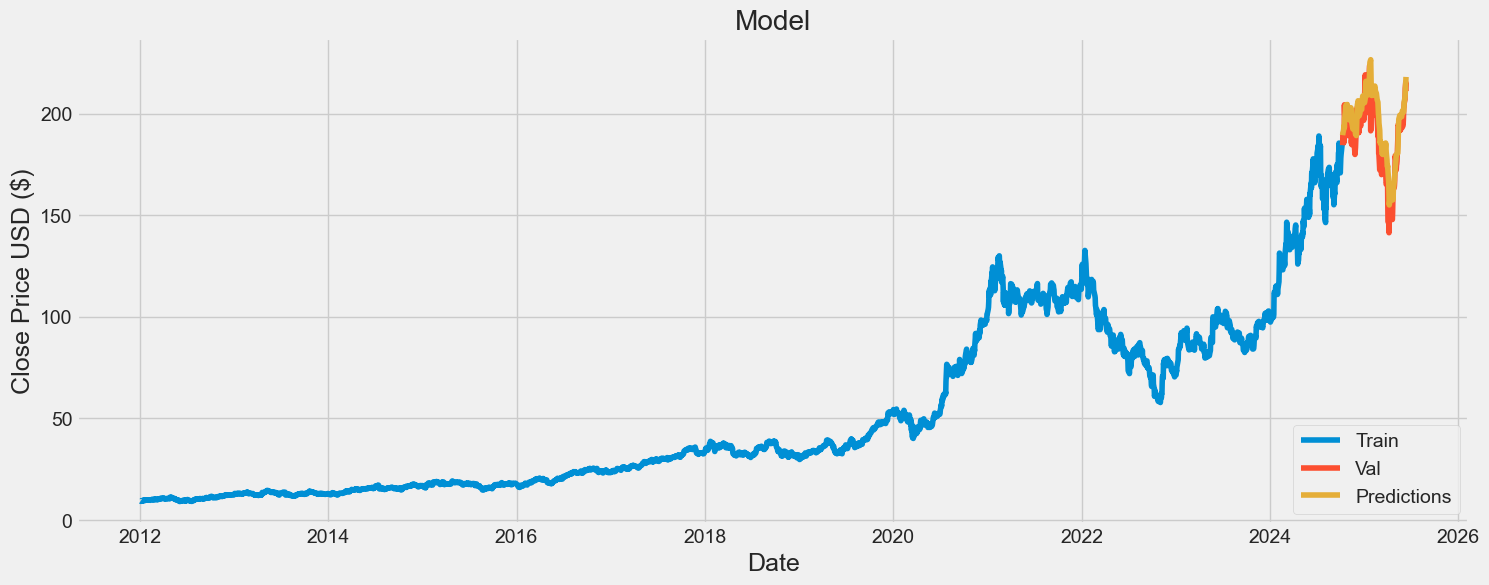

In [74]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['TSM'])
plt.plot(valid[['TSM', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Price Prediction**: Future price projections with confidence intervals

In [75]:
last_60_days = scaled_data[-60:]

future_predictions = []

current_batch = last_60_days.copy()

for i in range(90):
    current_input = current_batch[-60:]
    current_input = np.reshape(current_input, (1, 60, 1))

    current_prediction = model.predict(current_input)[0]

    future_predictions.append(current_prediction)

    current_batch = np.append(current_batch, current_prediction)

future_predictions = scaler.inverse_transform(future_predictions).reshape(-1, 1)

last_date = df.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 91)]

future_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predictions'])

future_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

,Predictions
2025-06-14,218.263552
2025-06-15,219.764683
2025-06-16,221.604701
2025-06-17,223.555626
2025-06-18,225.531355
...,...
2025-09-07,295.637673
2025-09-08,295.798740
2025-09-09,295.953458
2025-09-10,296.102186


In [76]:
from scipy import stats 

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

errors = valid['TSM'] - valid['Predictions']
std_error = errors.std()

time_factor = np.sqrt(np.arange(1, len(future_df) + 1))

future_df['Lower'] = future_df['Predictions'] - z_score * std_error * time_factor
future_df['Upper'] = future_df['Predictions'] + z_score * std_error * time_factor

sma50 = data['TSM'].rolling(window=50).mean()


In [77]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index,
    y=sma50,
    mode='lines',
    name='SMA50 (Historical)',
    line=dict(color='purple', width=2, dash='dash'),
    hovertemplate="<br><b>SMA50</b>: $%{y:.2f}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data['TSM'],
    mode='lines',
    name='Historical Data',
    line=dict(color='blue', width=2),
    hovertemplate="<b>Price</b>: $%{y:.2f}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=future_df.index,
    y=future_df['Predictions'],
    mode='lines',
    name='Mean Forecast',
    line=dict(color='red', width=2, dash='solid'),
    hovertemplate=(
        "<b>Mean Forecast</b>: $%{y:.2f}<br>"
        "<extra></extra>"
    )
))

fig.add_trace(go.Scatter(
    x=future_df.index,
    y=future_df['Upper'],
    mode='lines',
    name='Upper Bound',
    line=dict(width=0),  
    showlegend=False,
    hoverinfo='skip'
))

fig.add_trace(go.Scatter(
    x=future_df.index,
    y=future_df['Lower'],
    mode='lines',
    name='Lower Bound',
    fill='tonexty',  
    fillcolor='rgba(173, 216, 230, 0.5)',  
    line=dict(width=0), 
    showlegend=False,
    hovertemplate=(
        "<b>Lower Bound</b>: $%{y:.2f}<br>"
        "<b>Upper Bound</b>: $" + future_df['Upper'].apply(lambda x: f"{x:.2f}") +
        "<extra></extra>"
    )
))

fig.add_shape(
    type="line",
    x0=last_date,
    y0=data['TSM'].min() * 0.9,
    x1=last_date,
    y1=data['TSM'].max() * 1.1,
    line=dict(color="green", width=2, dash="dash"),
    name="Forecast Start"
)

fig.update_layout(
    title='TSM Price Forecast with Interactive 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price (USD)',
    hovermode="x unified",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template="plotly_white",
    height=700,
    annotations=[
        dict(
            x=0.02,
            y=0.02,
            xref="paper",
            yref="paper",
            text=f"Error Std: {std_error:.2f} | Confidence: {confidence_level*100:.0f}% | Forecast Start: {last_date.strftime('%Y-%m-%d')}",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(
                    args=[{"yaxis.type": "linear"}],
                    label="Linear Scale",
                    method="relayout"
                ),
                dict(
                    args=[{"yaxis.type": "log"}],
                    label="Log Scale",
                    method="relayout"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.data = (
    fig.data[1],   
    fig.data[0],   
    *fig.data[2:]  
)

fig.show()

In [81]:
html_content = fig.to_html(
    full_html=False,
    include_plotlyjs='cdn',
    config={'displayModeBar': True},
    div_id='tsm-forecast-chart'
)

with open("stock_report.html", "w") as f:
    f.write(f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <title></title>
        <style>
            .chart-container {{
                margin: 20px auto;
                border: 1px solid #eee;
                border-radius: 8px;
                padding: 15px;
            }}
        </style>
    </head>
    <body>
        <h1></h1>
        <div class="chart-container">
            {html_content}
        </div>
    </body>
    </html>
    """)